In [1]:
#Importing the necessary libraries.
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import preprocessing
from sklearn.externals import joblib

C:\Users\ssvin\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
#Label Encoding method for the categorical data
encoder = preprocessing.LabelEncoder()


In [3]:
#Creating the production pipeline object
encodefilename = "ModelEncoding_object.sav"
joblib.dump(encoder,encodefilename)

['ModelEncoding_object.sav']

In [4]:
#Reading the data from the csv
data = pd.read_csv('covid_data.csv')
data = data.drop('id',axis=1)
data = data.fillna(np.nan,axis=0)


In [5]:
#Encoding the categorical data.
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['country'] = encoder.fit_transform(data['country'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))
data[['symptom1']] = encoder.fit_transform(data['symptom1'].astype(str))
data[['symptom2']] = encoder.fit_transform(data['symptom2'].astype(str))
data[['symptom3']] = encoder.fit_transform(data['symptom3'].astype(str))
data[['symptom4']] = encoder.fit_transform(data['symptom4'].astype(str))
data[['symptom5']] = encoder.fit_transform(data['symptom5'].astype(str))
data[['symptom6']] = encoder.fit_transform(data['symptom6'].astype(str))

In [6]:
data

,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,74,3,1,66.0,01-03-2020,01-11-2020,1,0.0,1,0,14,30,22,12,3,1
1,71,3,0,56.0,1/15/2020,1/15/2020,0,1.0,1,0,14,30,22,12,3,1
2,98,3,1,46.0,01-04-2020,1/17/2020,0,1.0,1,0,14,30,22,12,3,1
3,85,3,0,60.0,NaN,NaN,1,0.0,1,0,14,30,22,12,3,1
4,85,3,1,58.0,NaN,NaN,0,0.0,1,0,14,30,22,12,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,79,11,0,40.0,1/25/2020,1/25/2020,0,1.0,0,1,6,30,22,12,3,1
795,4,5,1,33.0,NaN,NaN,0,0.0,0,0,19,5,15,3,0,1
796,4,5,2,NaN,NaN,NaN,0,0.0,0,0,14,30,22,12,3,1
797,4,5,2,NaN,NaN,NaN,0,0.0,0,0,14,30,22,12,3,1


In [7]:
#Get the no of days taken from symptoms observed to the hospital visit

data['sym_on'] = pd.to_datetime(data['sym_on'])
data['hosp_vis'] = pd.to_datetime(data['hosp_vis'])
data['sym_on']= data['sym_on'].map(dt.datetime.toordinal)
data['hosp_vis']= data['hosp_vis'].map(dt.datetime.toordinal)
data['diff_sym_hos']= data['hosp_vis'] - data['sym_on']

In [8]:
data = data.drop(['sym_on','hosp_vis'],axis=1)

In [9]:
data.dtypes

location          int32
country           int32
gender            int32
age             float64
vis_wuhan         int64
from_wuhan      float64
death             int64
recov             int64
symptom1          int32
symptom2          int32
symptom3          int32
symptom4          int32
symptom5          int32
symptom6          int32
diff_sym_hos      int64
dtype: object

In [10]:
#Get the data for number of death, recovered vs people from wuhan and people visited wuhan.


def counter2(colname1,colname2):
  colname1 = pd.Series(colname1)
  colname2 = pd.Series(colname2)
  count1 = 0
  for i in range(min([colname1.size,colname2.size])):
    if(colname1[i]==1 and colname2[i]==1):
      count1 = count1+1
  return count1

def counter1(colname):
  colname1 = pd.Series(colname)
  count = 0
  for i in range(colname1.size):
    if(colname1[i]==1):
      count = count+1
  return count

In [11]:
fwuh = counter1(data['from_wuhan'])
vwuh = counter1(data['vis_wuhan'])


In [12]:
print(counter1(data['death']))
print(counter2(data['from_wuhan'],data['death']))
print(counter2(data['vis_wuhan'],data['death']))

361
68
53


In [13]:
print(counter1(data['recov']))
print(counter2(data['from_wuhan'],data['recov']))
print(counter2(data['vis_wuhan'],data['recov']))

141
23
32


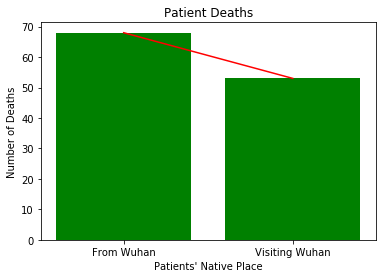

In [14]:
#Graphical representation of umber of death, recovered vs people from wuhan and people visited wuhan.
import matplotlib.pyplot as plt

plt.bar(['From Wuhan','Visiting Wuhan'],[counter2(data['death'],data['from_wuhan']),counter2(data['death'],data['vis_wuhan'])],color='green')
plt.title('Patient Deaths')
plt.xlabel('Patients\' Native Place')
plt.ylabel('Number of Deaths')
plt.plot([counter2(data['death'],data['from_wuhan']),counter2(data['death'],data['vis_wuhan'])],color='red')
plt.show()

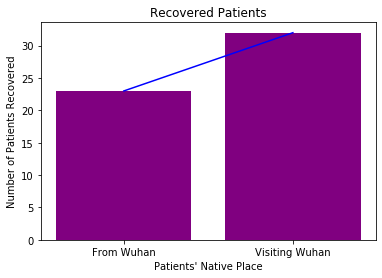

In [15]:
plt.bar(['From Wuhan','Visiting Wuhan'],[counter2(data['recov'],data['from_wuhan']),counter2(data['recov'],data['vis_wuhan'])],color='purple')
plt.title('Recovered Patients')
plt.xlabel('Patients\' Native Place')
plt.ylabel('Number of Patients Recovered')
plt.plot([counter2(data['recov'],data['from_wuhan']),counter2(data['recov'],data['vis_wuhan'])],color='blue')
plt.show()

In [16]:
data.isna().sum()

location          0
country           0
gender            0
age             104
vis_wuhan         0
from_wuhan        4
death             0
recov             0
symptom1          0
symptom2          0
symptom3          0
symptom4          0
symptom5          0
symptom6          0
diff_sym_hos      0
dtype: int64

In [17]:
#Isnull check
data['age'] = data['age'].fillna(value=data['age'].mean())

data['from_wuhan']=data['from_wuhan'].fillna(value=data['from_wuhan'].mode())

In [18]:
for column in ['from_wuhan']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [19]:
#Assigning Input and Output parameters
X = data[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = data['death']

In [20]:
data.isna().sum()

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
death           0
recov           0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
dtype: int64

In [21]:
#Scaling the input data
from sklearn.preprocessing import StandardScaler
StandardScalar = preprocessing.StandardScaler()
scaled_X = StandardScalar.fit(X).transform(X)

In [22]:
#Creating the production pipeline object
scalingfilename = "ModelScaling_object.sav"
joblib.dump(StandardScalar,scalingfilename)

['ModelScaling_object.sav']

In [23]:
scaled_X

array([[ 0.44564124, -1.0829998 ,  0.39613518, ...,  0.05682165,
         0.03539962,  2.70893403],
       [ 0.33595831, -1.0829998 , -1.15539426, ...,  0.05682165,
         0.03539962, -0.49586077],
       [ 1.32310468, -1.0829998 ,  0.39613518, ...,  0.05682165,
         0.03539962,  4.71193079],
       ...,
       [-2.11362712, -0.52919702,  1.94766461, ...,  0.05682165,
         0.03539962, -0.49586077],
       [-2.11362712, -0.52919702,  1.94766461, ...,  0.05682165,
         0.03539962, -0.49586077],
       [-2.11362712, -0.52919702,  1.94766461, ...,  0.05682165,
         0.03539962, -0.49586077]])

In [24]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(scaled_X,Y,test_size=0.2,random_state = 100)

In [41]:
#Defining the best hyperparameters with GridSearch CV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def RandomForestBestParams(X,Y,nFolds):
    n_estimators = [100, 200, 500, 1000, 2000]
    n_jobs=[1,-1]
    max_features=['auto','sqrt',None,'log2',0.9,0.2,1]
    min_samples_leaf = [10,9,7,6,5,4,3,2,1]
    params={'n_estimators': n_estimators,'n_jobs':n_jobs,'max_features':max_features,'min_samples_leaf':min_samples_leaf}
    model = GridSearchCV(RandomForestClassifier(),params,cv=nFolds)
    model.fit(X,Y)
    return model.best_params_

In [42]:
RandomForestBestParams(X_train,Y_train,2)

{'max_features': 'log2',
 'min_samples_leaf': 3,
 'n_estimators': 1000,
 'n_jobs': 1}

In [44]:
#Build and fit the model with the hyper parameters we obtained
model = RandomForestClassifier(max_features='log2',n_estimators=1000,n_jobs=1,min_samples_leaf=3,oob_score=True)
model.fit(X_train,Y_train)
model.oob_score_

0.7496087636932708

In [48]:
#Creating the production pipeline object
classifierfilename = "ModelClassification_object.sav"
joblib.dump(model,classifierfilename)

['ModelClassification_object.sav']

In [46]:
# gives an array of the features in numerical form giving their order of importance
model.feature_importances_

array([0.18449506, 0.29151168, 0.03090493, 0.23969566, 0.03855335,
       0.02687258, 0.06523796, 0.04060965, 0.01354678, 0.00209541,
       0.        , 0.        , 0.06647695])

In [39]:
Prob = model.predict_proba

In [37]:
Prob

<bound method ForestClassifier.predict_proba of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)>

location        0.184495
country         0.291512
gender          0.030905
age             0.239696
vis_wuhan       0.038553
from_wuhan      0.026873
symptom1        0.065238
symptom2        0.040610
symptom3        0.013547
symptom4        0.002095
symptom5        0.000000
symptom6        0.000000
diff_sym_hos    0.066477
dtype: float64


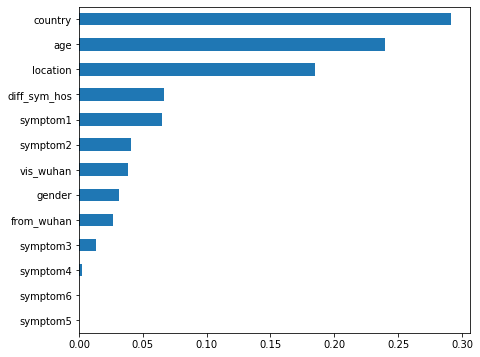

In [47]:
#Graphical representation to highlight the important features
%matplotlib inline
pd.Series(model.feature_importances_, index=X.columns)

#from ipykernel import kernelapp as app

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

In [31]:
#Predicting the outcome.
Y_predict = model.predict(X_test)

In [32]:
Y_predict

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
#Evaluation Metrics for the classification model built.
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_predict)

array([[83, 12],
       [20, 45]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

0.8

In [35]:
from sklearn.metrics import classification_report
target_names=['survived','not-survived']
print(classification_report(Y_test, Y_predict, target_names=target_names))

              precision    recall  f1-score   support

    survived       0.81      0.87      0.84        95
not-survived       0.79      0.69      0.74        65

    accuracy                           0.80       160
   macro avg       0.80      0.78      0.79       160
weighted avg       0.80      0.80      0.80       160

